# Geodesics and covariant derivative

- [Videos by eigenchris](https://www.youtube.com/watch?v=1CuTNveXJRc&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=17)


$$
\begin{align*}
\nabla_{u}(v) \\
= \nabla{a^i \partial_i}(b^j \partial_j) \\
= a_i \nabla_{\partial i}(b^j \partial_j) \\
= a_i (\nabla_{\partial_i}[b^j] \partial_j + b^j  \nabla_{\partial_i}[\partial_j]) \\
= a_i (\nabla_{\partial_i}[b^j] \partial_j + b^j  \Gamma^k_{ij} \partial_k) \\
= a_i (\partial_i[b^j] \partial_j + b^j  \Gamma^k_{ij} \partial_k) \\
= a_i (\partial_i[b^k] \partial_k + b^j  \Gamma^k_{ij} \partial_k) \\
= a_i (\partial_i[b^k] + b^j  \Gamma^k_{ij}) \partial_k\\
\end{align*}
$$

In [2]:
from sympy import *
import sympy as s
from sympy.calculus import *
from sympy.matrices import *
from sympy.vector import *
init_printing()

In [3]:
u, v, x, y, z = var("u v x y z")


p lengthsq: 1
e1 lengthsq: 1
e2 lengthsq: 1
e1: 


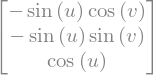

e2: 
Matrix([[-sin(v)*cos(u)], [cos(u)*cos(v)], [0]])
e1 dot e2: Matrix([[0]]) 
n lengthsq: cos(u)**2
n length after normalization: 1


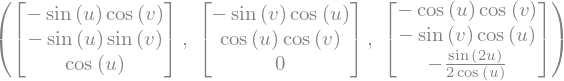

In [4]:
uv = {}

uv[z] = sin(u)
uv[x] = cos(u) * cos(v)
uv[y] = cos(u) * sin(v)

p = Matrix((uv[x], uv[y], uv[z])) # point on the sphere
print("p lengthsq: %s" % simplify(p.dot(p)))


e1, e2 = p.diff(u), p.diff(v)
print("e1 lengthsq: %s" % simplify((e1.dot(e1))))
print("e2 lengthsq: %s" % simplify((e1.dot(e1))))

print("e1: ")
display(e1)

print("e2: ")     
print(e2)
print("e1 dot e2: %s " % (e1.T @ e2)) # zero dot product, linearly independent
n = simplify(e1.cross(e2)) # normal vector
print("n lengthsq: %s" % simplify((n.dot(n))))
n = n / cos(u) # normalization
print("n length after normalization: %s" % simplify((n.dot(n)))) # important for further math to work out!

display((e1, e2, n)) # all three bases vectors
es = {1 : e1, 2: e2} # easy mapping from index to basis vector

In [5]:
xyz = {}
xyz[u] = asin(z) #
# xyz[v] = atan2(y / cos(asin(z)), x / cos(asin(z)))
xyz[v] = atan2(y, x)

display((xyz[u], xyz[v]))


e1 in xyz: 


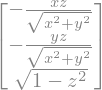

e2 in xyz: 


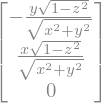

n in xyz: 


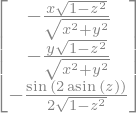

J e1 in xyz coordinates: 


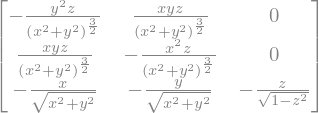

In [6]:

def uv_to_xyz(e):
    return e.subs(u, xyz[u]).subs(v, xyz[v])

print("e1 in xyz: ")
display(uv_to_xyz(e1))
print("e2 in xyz: ")
display(uv_to_xyz(e2))
print("n in xyz: ")
display(uv_to_xyz(n))

J_e1_x = simplify(uv_to_xyz(e1).diff(x))
J_e1_y = simplify(uv_to_xyz(e1).diff(y))
J_e1_z = simplify(uv_to_xyz(e1).diff(z))

# rate of change of e1 in xyz coordinates
J_e1 = Matrix([J_e1_x, J_e1_y, J_e1_z]).reshape(3, 3)
print("J e1 in xyz coordinates: ")
display(J_e1)


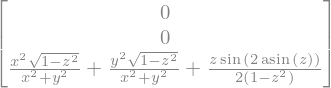

In [7]:
J_e1 @ uv_to_xyz(n) # component of rate of change of e1 along normal

gamma_e1_e1: 


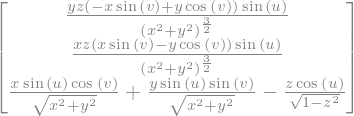

gamma_e1_e1_e1:


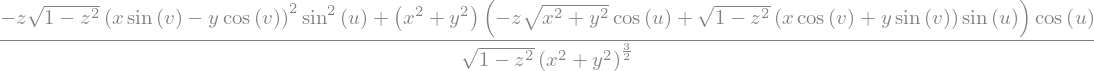

gamma_e1_e1_e2 


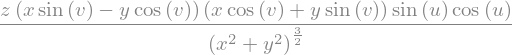

In [8]:
gamma_e1_e1 = simplify(J_e1 @ e1) # vector: rate of change of e1 along e2. Lies in tangent plane
print("gamma_e1_e1: ")
display(gamma_e1_e1)
gamma_e1_e1_e1 = simplify(gamma_e1_e1.dot(e1)) # component of (gamma_e1_e1)
gamma_e1_e1_e2 = simplify(gamma_e1_e1.dot(e2)) # component of (gamma_e1_e1) along e2
print("gamma_e1_e1_e1:")
display(gamma_e1_e1_e1)
print("gamma_e1_e1_e2 ")
display(gamma_e1_e1_e2)

J_e0:


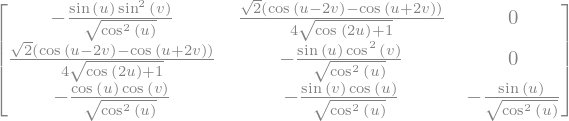

gamma[0][0][0]:


gamma[0][0][1]:


gamma[0][1][0]:


gamma[0][1][1]:


J_e1:


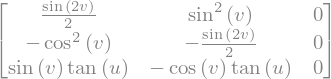

gamma[1][0][0]:


gamma[1][0][1]:


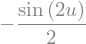

gamma[1][1][0]:


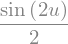

gamma[1][1][1]:


In [9]:
def xyz_to_uv(e):
    return e.subs(x, uv[x]).subs(y, uv[y]).subs(z, uv[z])

gamma = [[[None for _ in range(2)] for _ in range(2)] for _ in range(2)]
# gamma[i][j][k]: component of d(ei)/dej along ek 
es = [e1, e2]
for i in range(2):
    J_ei_x = simplify(uv_to_xyz(es[i]).diff(x))
    J_ei_y = simplify(uv_to_xyz(es[i]).diff(y))
    J_ei_z = simplify(uv_to_xyz(es[i]).diff(z))
    # rate of change of e1 in xyz coordinates
    J_ei = Matrix([J_ei_x, J_ei_y, J_ei_z]).reshape(3, 3)
    print(f"J_e{i}:")
    display(simplify(xyz_to_uv(J_ei)))
    for j in range(2):
        for k in range(2):
            gamma[i][j][k] = simplify(es[j].T @ J_ei @ es[k])[0]
            gamma[i][j][k] = simplify(xyz_to_uv(gamma[i][j][k]))
            print(f"gamma[{i}][{j}][{k}]:")
            display(gamma[i][j][k])

In [10]:
# del_T Y: for some tangent vector T for vector field Y, find gradient of vector field Y along T at each point 
# te1, e2, xe1, xe2 are expressions in terms of u and v
# returns a two tuple of coordinates. Entirely intrinsic, in that sense.
def covariant_derivative_by_projection(Te1, Te2, Ye1, Ye2):
    T = Matrix((Te1, Te1))
    Y = Matrix((Ye1, Ye2))
    J_Y_x = simplify(uv_to_xyz(Y).diff(x))
    J_Y_y = simplify(uv_to_xyz(Y).diff(y))
    J_Y_z = simplify(uv_to_xyz(Y).diff(z))
    J_Y = Matrix([J_Y_x, J_Y_y, J_Y_z]).reshape(3, 3)
    return simplify(J_Y @ T)

# returns a two tuple of coordinates.
def covariant_derivative_by_gamma(Te1, Te2, Ye1, Ye2):
    T = Matrix((Te1, Te1))
    Y = Matrix((Ye1, Ye2))
    # del_{Ti ei} (Yj ej)
    
    # = del_{Te1 e1} (Yj ej) +
    #   del_{Te2 e2} (Yj ej)
    
    # = del_{Te1 e1} (Ye1 e1) + del_{Te1 e1} (Ye2 e2) 
    #   del_{Te2 e2} (Ye1 e1) + del_{Te2 e2} (Ye2 e2)
    
    # = Te1 (del_{e1} (Ye1) + Y1 del_{e1}(e1)) + Te1 (del_{e1}(Y)e2 + Ye2 del_{e1}(e2) )
    #   del_{Te2 e2} (Ye1 e1) + del_{Te2 e2} (Ye2 e2)
    
    J_Y_e1 = Y.diff(u) # because e1 = p.diff(u) / e1 = d/du
    J_Y_e2 = Y.diff(v) # because e2 = p.diff(v) / e2 = d/dv
    
    out_u = 0; out_v = 0;
    out_u +=  Te1 * Ye1 * gamma_e1_e1_e1
    out_u +=  Te1 * Ye1 * gamma_e1_e2_e1
    out_u +=  Te1 * Ye1 * gamma_e2_e1_e1
    out_u +=  Te1 * Ye1 * gamma_e2_e2_e1
    out_u += Te1 * J_Y_e1
    
    out_v +=  Te2 * Ye2 * gamma_e1_e1_e2
    out_v +=  Te2 * Ye2 * gamma_e1_e2_e2
    out_v +=  Te2 * Ye2 * gamma_e2_e1_e2
    out_v +=  Te2 * Ye2 * gamma_e2_e2_e2
    out_v += Te2 * J_Y_e2
    return (simplify(out_u), simplify(out_v))
    